# THE BASICS

## Tensor Orders


1. $1^{st}$-Order Tensors - Vectors

    A $1^{st}$-Order Tensor is either a row or column vector. We often see it denoted as having shape of either $\mathbb{R}^{Mx1}$ or $\mathbb{R}^{1xN}$. Here, M dictates the number of rows (elements) in the column vector. N dictates the number of columns (elements) in the row vector. $\mathbb{R}$ represents the overall state of the $1^{st}$-Order tensor. It means that the tensor is constructed of all real values and is in the shape of {M x 1} or {1 x N}.
    
    $$
        A = 
        \begin{bmatrix}
        1 & 2 & 3
        \end{bmatrix}
    $$

    Where **A** is a 1 x 3 Vector

    $$
        B = 
        \begin{bmatrix}
        4 \\ 5 \\ 6
        \end{bmatrix}
    $$

    Where **B** is a 3 x 1 matrix.


2. $2^{nd}$-Order Tensors - Matrices

    A $2^{nd}$-Order Tensor is a matrix. Throughout the tutorial, we will only deal with real numbers. Therefore if **A** is a $2^{nd}$-Order Tensor having **M** rows and **N** columns, then A $\in \mathbb{R}^{MxN}$.

    $$
      A = 
      \begin{bmatrix}
      1 & 2 & 3 \\
      4 & 5 & 6 \\
      7 & 8 & 9
      \end{bmatrix}
    $$

    $ A \in \mathbb{R}^{3x3} $

3. $3^{rd}$-Order Tensors - Cubes

    A $3^{rd}$-Order Tensors can be thought of as a cube or stacked matrices. Therefore if **A** is a $3^{rd}$-Order Tensor having K instances of matrices of shape I rows and J columns, it would be denoted as **A** $\in \mathbb{R}^{IxJxK}$

    $$
        A = 
        \begin{bmatrix}
            \begin{bmatrix}
                1 & 2 & 3 \\
                4 & 5 & 6 \\
                7 & 8 & 9 \\
                10 & 11 & 12
            \end{bmatrix}
                
            \begin{bmatrix}
                11 & 12 & 13 \\
                14 & 15 & 16 \\
                17 & 18 & 19 \\
                20 & 21 & 22
            \end{bmatrix}

            \begin{bmatrix}
                31 & 32 & 33 \\
                34 & 35 & 36 \\
                37 & 38 & 39 \\
                40 & 41 & 42
            \end{bmatrix}
        \end{bmatrix}
    $$

    
       $$ A \in \mathbb{R}^{4x3x3}$$
    

## Factorization


To understand the premise of this paper (this method) we first need to get an understanding and intrinsic level of intuition for factorization. 

### Example 1
Let's start with simple number factorization. If I give the number 24 and ask for the lowest factors possible, we can see that those factors are 3 and 2. This means that as long as I have both 3 and 2, I can reproduce 24. These are the most important building blocks of 24.

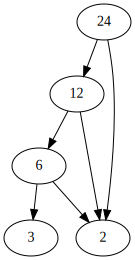

In [1]:

from graphviz import Digraph
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('a', '24')
dot.node('b', '12')
dot.node('c', '2')
dot.node('d','6')
dot.node('e','3')

# Add edges
dot.edges(['ab', 'ac', 'bd', 'bc', 'de', 'dc'])

# Visualize the graph
dot

### Example 2

If **X** is defined as the set of numbers in:

$$
\{1,3,6,9,18,27,36,54,81,162\}
$$

We can actually store all the information we need about this set in the form of:

$$
\{1,3,6,9\}
$$

And this is becuase as long as we have these 4 numbers, we can create every value in **X**.


### Example 3


For a more relevant example. If the matrix **A** $\in \mathbb{R}^{4x4}$ is defined as:
$$
A = 
\begin{bmatrix}
2 & 12 & 6 & 18 \\
7 & 42 & 21 & 63 \\
4 & 24 & 12 & 36 \\
1 & 6 & 3 & 9
\end{bmatrix}
$$

We can actually find two vectors that encompass all the information in *A* but in a reduced form. Without formal proof, the two vectors:

$$
v1 = 
\begin{bmatrix}
2 \\ 7 \\ 4 \\ 1
\end{bmatrix}

, 

v2 = 
\begin{bmatrix}
1 \\ 6 \\ 3 \\ 9
\end{bmatrix}
$$

Will reproduce **A** when the outer product is taken between v1 and v2:

$$
v1 \otimes v2 = 

\begin{bmatrix}
2 \\ 7 \\ 4 \\ 1
\end{bmatrix}
\otimes
\begin{bmatrix}
1 & 6 & 3 & 9
\end{bmatrix}
=
\begin{bmatrix}
2*1 & 2*6 & 2*3 & 2*9 \\
7*1 & 7*6 & 7*3 & 7*9 \\
4*1 & 4*6 & 4*3 & 4*9 \\
1*1 & 1*6 & 1*3 & 1*9
\end{bmatrix}
=
\begin{bmatrix}
2 & 12 & 6 & 18 \\
7 & 42 & 21 & 63 \\
4 & 24 & 12 & 36 \\
1 & 6 & 3 & 9
\end{bmatrix}
$$


### A Note on Rank

You'll notice that v1 and v2 are both 1-D vectors that when the outer product is taken, creates a 4x4 matrix **A**. Since both of these vectors a matrices of 1 column (or row), it is said that the resultant matrix **A** is a ***RANK 1*** matrix. Now, depending on what source or post you read, you'll get conflicting information on what the rank of a tensor or matrix is. For example, if we read the definition for rank of a tensor on Tensorflow's site, it says the rank is simply the number of dimensions of the tensor:

<img src='https://scratchpaper.s3.amazonaws.com/tensor_topic_analysis/tf_rank.png'>



Yet this is inaccurate in the context of this paper. Wikipedia actually gives a better definition of tensor rank

<img src='https://scratchpaper.s3.amazonaws.com/tensor_topic_analysis/rank_wiki.png'>

> The rank of a tensor is the minimum number of simple tensors that sum to T

I bring this up because it is paramount we understand the meaning of rank in the context of this paper. This frist definition (from Tensorflow) you will actually see in a multitude of place including Wolfram. 



#### Problem with Rank as Dimensions

As seen in the previous example with matrix

$$
A = 
\begin{bmatrix}
2 & 12 & 6 & 18 \\
7 & 42 & 21 & 63 \\
4 & 24 & 12 & 36 \\
1 & 6 & 3 & 9
\end{bmatrix}
$$

The basic definition would have you believe the rank of this matrix is 2 since there are two dimensions {rows} and {columns}. But we saw that **A** actually decomposes to **v1** and **v2**, each a column (or row) vector. Since A is a linear combination of single column vectors, it is rank is actually 1. 


To demonstrate a rank 2 matrix, if we had matrix **B**

$$
B = 
\begin{bmatrix}
10 & 30 & 44 & 31 \\
16 & 44 & 60 & 42 \\
21 & 54 & 69 & 48 \\
21 & 44 & 43 & 29
\end{bmatrix}
$$

Without formal proof, **B** could decompose to **v1** and **v2** of:

$$
B =
\begin{bmatrix}
1 & 6 \\
2 & 8 \\
3 & 9 \\
4 & 5
\end{bmatrix}_{v1}
\otimes
\begin{bmatrix}
4 & 6 & 2 & 1 \\
1 & 4 & 7 & 5
\end{bmatrix}_{v2}
=
 \sum_{r=1}^R v_1 \otimes v_2 = 
\begin{bmatrix}
1 \\
2 \\
3 \\
4
\end{bmatrix}
\otimes
\begin{bmatrix}
4 & 6 & 2 & 1
\end{bmatrix}
+
\begin{bmatrix}
6 \\
8 \\
9 \\
5
\end{bmatrix}
\otimes
\begin{bmatrix}
1 & 4 & 7 & 5
\end{bmatrix}
=
\begin{bmatrix}
10 & 30 & 44 & 31 \\
16 & 44 & 60 & 42 \\
21 & 54 & 69 & 48 \\
21 & 44 & 43 & 29
\end{bmatrix}
$$

Because **B** is a linear combination of **v1** and **v2**, each matrices consisting of 2 column-vectors, the rank of **B** is two. In this instance, it just happens to be a rank value that matches the number of dimensions of **B**. But the existence of 2 dimensions is not what gives this matrix a rank of 2

## Decomposition of Matrices

So how do we get to this v1 and v2 if we are only given the final matrix **B**. Well, there's multiple ways to go about it. Too many to actually cover here, but I want to at least cover the basics and give an idea. Let's switch up some notation. Instead of v1 and v2, let's denote the decomposed matrices as H and W. H (v1) is for the decomposed matrix with the column vectors and W (v2) is the matrix with row vectors as seen above. We essentially are trying some H and W such that their outer product either equals *B* or gets very close. More concretely

$$
B = HW
$$

If we can find the perfect H and W, then we have it such that 

$$ B - HW = 0$$

Finding the perfect H and W is a challenge, so we want to find some that keeps the error as low as possible. In other words, we want to find H and W that minimizes the error between B and the outer product of H and W

$$
min_{HW} \text{   }\begin{bmatrix}B - HW \end{bmatrix}
$$

This optimization isn't very nice. Something we can do to make our lives easier is to minimize the squared error. If that doesn't ring some bells, it should. Because this has turned into solving a *Least Squares* problem

$$
min_{HW} \text{   }\begin{bmatrix}B - HW \end{bmatrix}^2
$$

By minimizing the squared error, we have turned the objective function into a convex curve. From calculus, we know the minimum of a convex curve is where the derivative equals 0

$$
min_{HW} \text{   }\begin{bmatrix}B - HW \end{bmatrix}^2 => \frac{d}{dHW} \begin{bmatrix}B - HW \end{bmatrix}^2 = 0
$$

That derivative shouldn't look right to you. We want to take the derivative of the objective function, but there are two unknowns, H and W. We have two unknowns and one equation. We are faced with an underdetermined system. A ubiqutious way to solve this least squares problem is by employing a method called alternating least squares. Since we have two unknowns, we first fix one of the unkonwns and model it as a constant. We then take the derivative of the objective function with respect to the non fixed variable, set it euqal to 0 and solve. We then hold that variable fixed and take the derivative of the fucntion with respect to the previously held fixed variable. We alternate back and forth until we converge to a solution. Hence **Alternating Least Squares** or **ALS**

### Partial Derivatives

$$
\frac{\partial}{\partial H} \begin{bmatrix} B - HW \end{bmatrix}^2
$$

In [2]:
A

NameError: name 'A' is not defined

In [3]:
rank = 1
m,n = A.shape
U = np.random.rand(m,rank)
V = np.random.rand(rank,n)
print(f'U matrix shape: {U.shape}\nV matrix shape {V.shape}')

NameError: name 'A' is not defined

In [75]:
def als(M, d, lam, iters):
    #intialize U
    #shape should be rank x M[rows]
    H = np.random.random((d, M.shape[0]))
    W = np.random.random((M.shape[1], d))
    
    #storage for errors per iteration
    train_errors = []

    

    
    #iterate
    for _ in range(iters):
        
        AW = M@H.T
        BW = H@H.T
        CW = W@BW
        W = W * (AW/CW)
        
        
        AH = M@W
        BH = W.T@W
        CH = H.T@BH.T
        H = H.T * (AH/CH)

    return H, W



In [84]:
h,w = als(A, 1, 0,100)

In [85]:
w@h.T

array([[ 3.71428571, 13.        ,  7.42857143,  1.85714286],
       [13.        , 45.5       , 26.        ,  6.5       ],
       [ 7.42857143, 26.        , 14.85714286,  3.71428571],
       [ 1.85714286,  6.5       ,  3.71428571,  0.92857143]])

In [83]:
A

array([[ 2, 12,  6, 18],
       [ 7, 42, 21, 63],
       [ 4, 24, 12, 36],
       [ 1,  6,  3,  9]])

In [ ]:
def als(M, d, lam, iters):
    #intialize U
    #shape should be rank x M[rows]
    U = np.random.random((d, M.shape[0]))
    
    #storage for errors per iteration
    train_errors = []

    

    
    #iterate
    for _ in range(iters):
        
        #hold U constant and update V
        V = np.linalg.pinv(U.dot(U.T) + lam * np.eye(d)).dot(U.dot(M))
 
        #hold V constant and update U
        U = np.linalg.pinv(V.dot(V.T) + lam * np.eye(d)).dot(V.dot(M.T))

    return U,V